In [26]:
import pandas as pd
from random import uniform
import math
import matplotlib.pyplot as plt
gender_df = pd.read_csv('gender_purchase.csv')
gender_df.head(3)

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No


In [5]:
table = pd.crosstab(gender_df['Gender'], gender_df['Purchase'])
table

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [45]:
random=[]
xlist = []
for i in range(200):
    x = uniform(0,10)# choose numbers between 0 and 10 
    xlist.append(x)
    random.append(math.log(x))

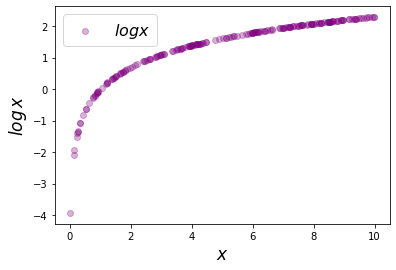

In [46]:
plt.scatter(xlist, random, c='purple',alpha=0.3,label=r'$log x$')
plt.ylabel(r'$log \, x$', fontsize=17)
plt.xlabel(r'$x$',fontsize=17)
plt.legend(fontsize=16)
plt.show()

#### Coeff Comparison
Higher the coeff , straigter the S-curve

In [58]:
random1=[]
random2=[]
random3=[]
xlist = []
theta=[10, 1,0.1]
for i in range(100):
    x = uniform(-5,5)
    xlist.append(x)
    logreg1 = 1/(1+math.exp(-(theta[0]*x)))
    logreg2 = 1/(1+math.exp(-(theta[1]*x)))
    logreg3 = 1/(1+math.exp(-(theta[2]*x)))
    random1.append(logreg1)
    random2.append(logreg2)
    random3.append(logreg3)

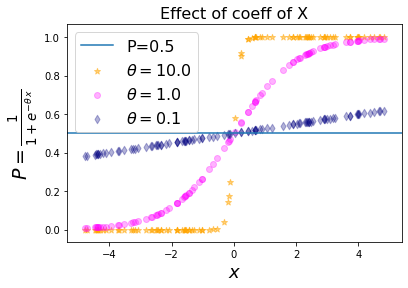

In [62]:
plt.scatter(xlist, random1, marker='*',s=40, c='orange',alpha=0.5,label=r'$\theta = %3.1f$'%(theta[0]))
plt.scatter(xlist, random2, c='magenta',alpha=0.3,label=r'$\theta = %3.1f$'%(theta[1]))
plt.scatter(xlist, random3, c='navy',marker='d', alpha=0.3,label=r'$\theta = %3.1f$'%(theta[2]))
plt.axhline(y=0.5, label='P=0.5')
plt.ylabel(r'$P=\frac{1}{1+e^{-\theta \, x}}$', fontsize=19)
plt.xlabel(r'$x$',fontsize=18)
plt.legend(fontsize=16)
plt.title("Effect of coeff of X",fontsize = 16)
plt.show()

#### Intercept Comparison
Higher the intercept the curve shift towards x-axis

In [63]:
random1=[]
random2=[]
random3=[]
xlist = []
intercept=[10, 0,-10]
theta = 10.0
for i in range(100):
    x = uniform(-5,5)
    xlist.append(x)
    logreg1 = 1/(1+math.exp(-(intercept[0] + theta*x)))
    logreg2 = 1/(1+math.exp(-(intercept[1] + theta*x)))
    logreg3 = 1/(1+math.exp(-(intercept[2] + theta*x)))
    random1.append(logreg1)
    random2.append(logreg2)
    random3.append(logreg3)

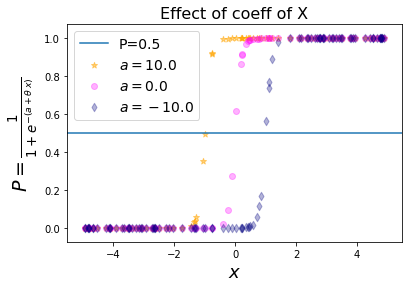

In [70]:
plt.scatter(xlist, random1, marker='*',s=40, c='orange',alpha=0.5,label=r'$a = %3.1f$'%(intercept[0]))
plt.scatter(xlist, random2, c='magenta',alpha=0.3,label=r'$a = %3.1f$'%(intercept[1]))
plt.scatter(xlist, random3, c='navy',marker='d', alpha=0.3,label=r'$a = %3.1f$'%(intercept[2]))
plt.axhline(y=0.5, label='P=0.5')
plt.ylabel(r'$P=\frac{1}{1+e^{-(a+\theta \, x)}}$', fontsize=19)
plt.xlabel(r'$x$',fontsize=18)
plt.legend(fontsize=14)
plt.title("Effect of coeff of X",fontsize = 16)
plt.show()

#### Binomial Disctribution

$P(X)={\frac{n!}{(n-x)!.x!}}.p^x.q^{n-x}$



In [93]:
p = 0.5
s = 40
prob_list = []
xlist= []

for x in range(n):
    xlist.append(x)
    nCx = math.factorial(n)/(math.factorial(n-x)*math.factorial(x))
    Prob = nCx * math.pow(p,x) * math.pow((1-p),(n-x))
    prob_list.append(Prob)


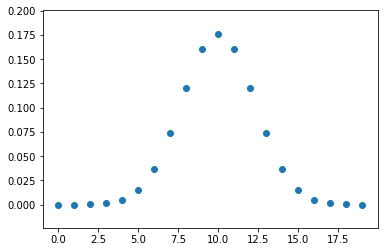

In [94]:
plt.scatter(xlist,prob_list)

In [84]:
xlist

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

##### Logit function
$Logit = ln({\frac{p}{1-p}})$

In [98]:
loglist = []
plist= []
for n in range(100):
    p = uniform(0,1)
    plist.append(p)
    logit = math.log(p/(1-p))
    loglist.append(logit)

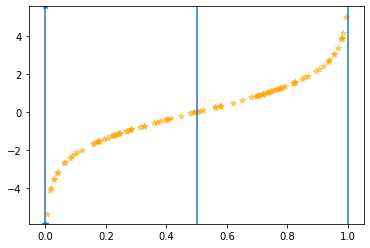

In [108]:
plt.scatter(plist,loglist,marker='*',s=40, c='orange',alpha=0.5,label=r'$Logit = ln({\frac{p}{1-p}})$')
plt.axvline(x=0,marker='*')
plt.axvline(x=0.5)
plt.axvline(x=1)

#### Sklean Example

In [127]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
cancer = load_breast_cancer()
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)


In [112]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(cancer.data, cancer.target, test_size=0.3, stratify=cancer.target, random_state=30)

In [116]:
cancerclf = LogisticRegression()
cancerclf.fit(X_trainc, y_trainc)
print ("Logreg score on cancer data set", cancerclf.score(X_testc, y_testc))

Logreg score on cancer data set 0.9532163742690059


In [118]:
predict = cancerclf.predict(X_testc)
print(predict)

[1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0
 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0
 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1]


In [124]:
probac=cancerclf.predict_proba(X_testc)
probability = probac[:,0]
prob_df = pd.DataFrame(probability)
print (prob_df.head(10) )# this should match the probac 1st column 


          0
0  0.005366
1  0.058622
2  0.007252
3  0.999938
4  0.047550
5  0.966861
6  0.309661
7  0.999688
8  0.000681
9  0.999998


In [137]:
prob_df['predict'] = np.where(prob_df[0]>=0.6, 1, 0)
print (len(prob_df[prob_df['predict']==1]))

55


171